# Load Gillespie simulation data

```md
From `./data/gillespie_sims/{test_name}`:
    - `average_curve_{num_samples}.csv
    - (`average_curve_{nsims}.csv` not needed here)
    - `continuous_observations_{num_sample}.csv`
```    

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import pickle
import random
import os
import sys
sys.path.append('../../src/')
sys.path.append('../../scripts/')
from solve_kolmogorov import *
from simulate_gillespie import *
from estimate_total_rates import *

In [2]:
# --- setup ---
N = 1000
I0 = 50
nsims = 100
time_max = 10.0

In [8]:
## load from CSVs
num_samples = 10
csv_base_dir = "../../data/gillespie_sims/"

In [9]:
test_names = ["complete", "random_ER", "regular", "scale_free"]
test_name = test_names[0]
csv_dir = os.path.join(csv_base_dir, test_name)
print(f"Loading from {csv_dir}")

Loading from ../../data/gillespie_sims/complete


In [10]:
## load average curve
avg_curve_file_name = os.path.join(csv_dir, f"average_curve_{num_samples}.csv")
df_average_loaded = pd.read_csv(avg_curve_file_name)
print(f"Loaded df_average_loaded from {avg_curve_file_name}")

times_loaded = df_average_loaded['time'].to_numpy()
avg_curve_loaded = df_average_loaded['avg_infected_k'].to_numpy()

len(times_loaded), len(avg_curve_loaded)

Loaded df_average_loaded from ../../data/gillespie_sims/complete/average_curve_10.csv


(1001, 1001)

In [11]:
## load sample of X_sims 
X_sims_loaded_from_csv = []
for i in range(num_samples):
    sample_number = i + 1
    csv_filename = os.path.join(csv_dir, f"continuous_observations_{sample_number}.csv")
    df_loaded_run = pd.read_csv(csv_filename)

    run_times_loaded = df_loaded_run["t"].to_numpy()
    waiting_times_loaded = df_loaded_run["waiting_time"].to_numpy()
    infected_loaded = df_loaded_run["total_infected"].to_numpy(dtype=int)
    event_types_loaded = df_loaded_run["event_type"].to_numpy()
    pw_counts_loaded = df_loaded_run["total_pw_count"].to_numpy()
    ho_counts_loaded = df_loaded_run["total_ho_count"].to_numpy()

    event_types_processed = np.array([None if pd.isna(x) else x for x in event_types_loaded], dtype=object)

    def nan_to_none_if_object(arr):
        return np.array([None if pd.isna(x) else x for x in arr], dtype=object)

    waiting_times_processed = nan_to_none_if_object(waiting_times_loaded)
    pw_counts_processed = nan_to_none_if_object(pw_counts_loaded)
    ho_counts_processed = nan_to_none_if_object(ho_counts_loaded)

    # stack them into (6, num_events) structure
    X_t_reconstructed = np.array([
        run_times_loaded,
        waiting_times_processed,
        infected_loaded,
        event_types_processed,
        pw_counts_processed,
        ho_counts_processed
    ], dtype=object) # the outer array is also object type

    X_sims_loaded_from_csv.append(X_t_reconstructed)
    print(f"Loaded and reconstructed run {sample_number}")

Loaded and reconstructed run 1
Loaded and reconstructed run 2
Loaded and reconstructed run 3
Loaded and reconstructed run 4
Loaded and reconstructed run 5
Loaded and reconstructed run 6
Loaded and reconstructed run 7
Loaded and reconstructed run 8
Loaded and reconstructed run 9
Loaded and reconstructed run 10


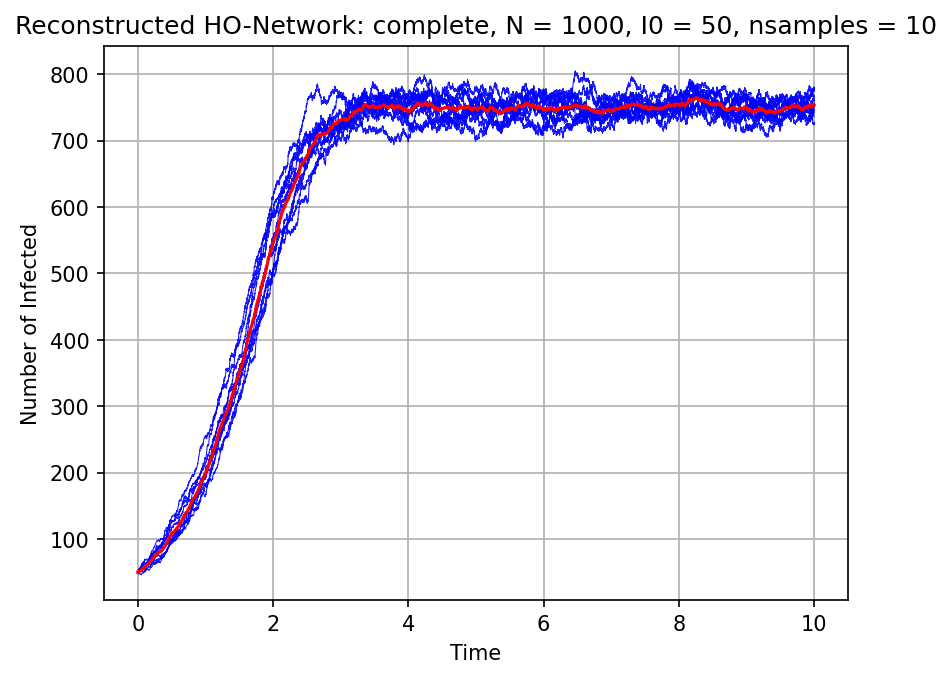

In [12]:
## plot 
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims_loaded_from_csv:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

plt.plot(times_loaded, avg_curve_loaded, "red")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"Reconstructed HO-Network: {test_name}, N = {N}, I0 = {I0}, nsamples = {num_samples}")
plt.show()